In [768]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
    
})


In [750]:
df = pd.read_excel('GertrudeTables and figures data 1.7.2024.xlsx',  sheet_name='Age, education level, etc')

df2 = pd.read_excel('GertrudeTables and figures data 1.7.2024.xlsx')

In [751]:
df.tail()

,S/NO.,NAME,AGE,GENDER,OCCUPATION,ADDRESS,LOCATION,COUNTY,Species,Use,level of education,Date,Recognition,More or Less,Cultivation,Trade,Consrvation measures
79,80.0,David Wakoli,41-60,Male,Teacher,NaN,Kanduyi,Bungoma,K. prittiwitzii,Medicine- Body clenser,Teartiary,01.12.2020,Morphological,NaN,Yes,No,No
80,81.0,Edith Ayoma,>60,Female,Teacher,720534072,Ndalu,Bungoma,K. priittiwitzii,"Medicine- relieving colic in children, blood c...",Teartiary,01.12.2020,Morphological,Less (10 years),No,No,No
81,82.0,Joel Loso,21-40,Male,Camp worker,703913316,Osupuko,Narok,"K. cf. lateritia (Emasilgi), K. nyikae","K. cf. lateritia- Medicine -antifungal, skin i...",None,26.11.2020,Morphological,Less 10yrs ago (More during rainy season). Har...,No,No,NO
82,83.0,Doris Khatete,41-60,Female,Lecturer,722445932,Kabuchai,Bungoma,K. marmorata,Medicine- Sprains,Teartiary,29.11. 2020,Morphological,Less (10yrs),No,No,No
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ornamental,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [752]:
df['COUNTY'].value_counts()

Narok              20
Taita Taveta        9
Bungoma             8
Bomet               5
Kwale               5
West Pokot          4
Machakos            4
Vihiga              3
Elgeyo Marakwet     2
Nairobi             2
Busia               2
Kiambu              2
Kitui               2
Baringo             2
Kericho             1
Nyanza              1
Kibwezi             1
Trans Nzoia         1
Nakuru              1
Nyandarua           1
Naivasha            1
Gatundu North       1
Kakamega            1
Trans nzoia         1
bungoma             1
Makueni             1
Name: COUNTY, dtype: int64

In [754]:
df['AGE'] = df['AGE'].replace('Below 20', '< 21')
df['AGE'] = df['AGE'].replace('18-20', '< 21')
df['AGE'] = df['AGE'].replace(20, '< 21')
df['AGE'] = df['AGE'].replace('<21', '< 21')
df['AGE'] = df['AGE'].replace('>60', '> 60')
df = df.rename(columns={'GENDER': 'Gender'})

In [755]:
df['AGE'].value_counts()

21-40    33
41-60    30
> 60     14
< 21      5
Name: AGE, dtype: int64

In [756]:
df['AGE'].describe()

count        82
unique        4
top       21-40
freq         33
Name: AGE, dtype: object

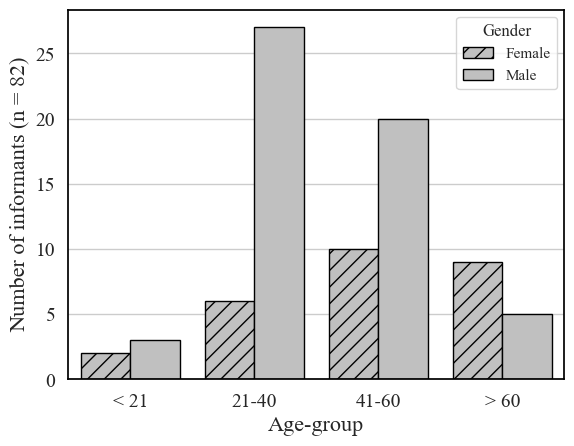

In [772]:
import matplotlib.patches as mpatches
palette= ('silver','silver')
mpl.rcParams['font.family'] = 'Times New Roman'

order =('< 21', '21-40', '41-60','> 60' )
# Plot using seaborn
ax= sns.countplot(x='AGE', hue='Gender',data= df, palette= palette, order = order,  edgecolor='black')
plt.ylabel('Count')


# Apply hatching to bars of one gender
for patch, gender in zip(ax.patches, [df['Gender'][i // len(order)] for i in range(len(df))]):
    if gender == 'Female':
        patch.set_hatch('//')
        
# Create custom legend handles
handles, labels = ax.get_legend_handles_labels()
hatch_handle = mpatches.Patch(facecolor='silver', edgecolor='black', hatch='', label='Male')
solid_handle = mpatches.Patch(facecolor='silver', edgecolor='black', hatch='//',label='Female')

# Update the legend
ax.legend(handles=[solid_handle, hatch_handle], title='Gender')


# Set spines color to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.xlabel('Age-group', size = 16)
plt.ylabel('Number of informants (n = 82)', size = 16)
# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [758]:

df2 = df2.rename(columns={'Unnamed: 1': 'Use-category'})
df2 = df2.sort_values(by = '% citation', ascending = False)
df2

,Use categories,Use-category,Nt (Number of species used for the ailment,Nur (Number of use citation for each ailment),Informant Consensus factor (ICF)-[Nur-Nt/Nur-1],% citation
1,Medicine,Injuries,9,22,0.52,23.90
2,Medicine,Muscular-skeletal system disorders,8,11,0.30,11.96
10,Medicine,Pain,9,9,0.00,9.78
0,Medicine,Digestive system disorders,8,8,0.00,8.70
3,Medicine,Blood system disorders,6,8,0.29,8.70
9,Medicine,Skin/subcutaneous cellular tissue disorders,7,8,0.14,8.70
7,Medicine,Infections,4,5,0.25,5.43
15,Environmental uses,NaN,4,4,0.00,4.34
5,Medicine,Reproductive system disorders,3,3,0.00,3.26
14,Food (vegetable),NaN,3,3,0.00,3.26


In [759]:
df2.tail()
grouped_df2 = df2.groupby('Use categories')['% citation'].sum().reset_index()
grouped_df2 = grouped_df.sort_values(by = '% citation', ascending = False)

In [607]:
# Filter rows where 'Use categories' is 'Medicine' and select specific columns
medicine_rows = df2[df2['Use categories'] == 'Medicine'][['Use-category', 'Nur (Number of use citation for each ailment)']]

In [608]:
medicine_rows['Nur (Number of use citation for each ailment)'].sum()

78

In [637]:
medicine_rows['Percentage of citations (%)'] = medicine_rows['Nur (Number of use citation for each ailment)'].apply(lambda x: (100 / 78) * x)

# Display the updated DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="Updated Medicine Rows", dataframe=medicine_rows)


In [638]:
medicine_rows

,Use-category,Nur (Number of use citation for each ailment),Percentage of citations (%)
1,Injuries,22,28.205128
2,Muscular-skeletal system disorders,11,14.102564
10,Pain,9,11.538462
0,Digestive system disorders,8,10.256410
3,Blood system disorders,8,10.256410
9,Skin/subcutaneous cellular tissue disorders,8,10.256410
7,Infections,5,6.410256
5,Reproductive system disorders,3,3.846154
8,Sensory system disorders,2,2.564103
4,Circulatory system disorders,1,1.282051


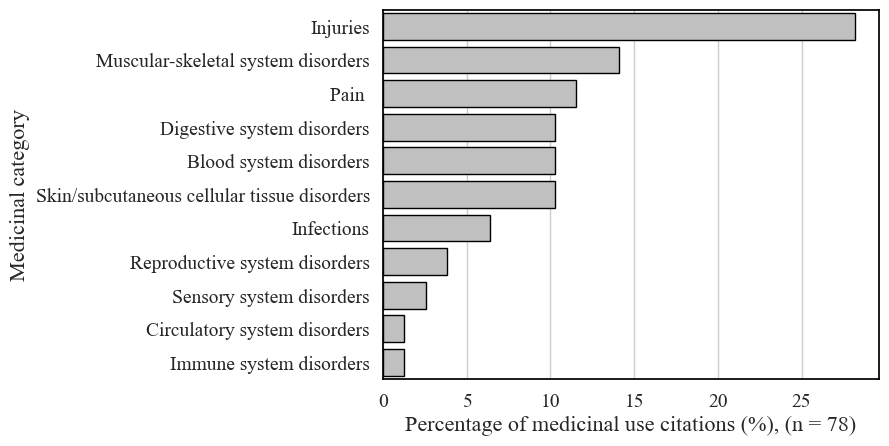

In [771]:

# Set Seaborn style
sns.set(style="whitegrid")
mpl.rcParams['font.family'] = 'Times New Roman'
# Calculate percentages
#total_citations = medicine_rows['Nur (Number of use citation for each ailment)'].sum()
#medicine_rows['Percentage of citations (%)'] = (100/ total_citations) * medicine_rows['Nur (Number of use citation for each ailment)'] 
ax = sns.barplot(data = medicine_rows, x ='Percentage of citations (%)', y = 'Use-category', edgecolor='black', color = 'silver', linewidth=1) 
plt.ylabel('Medicinal category', size = 16)
plt.xlabel('Percentage of medicinal use citations (%), (n = 78)', size = 16)

# Set spines color to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()


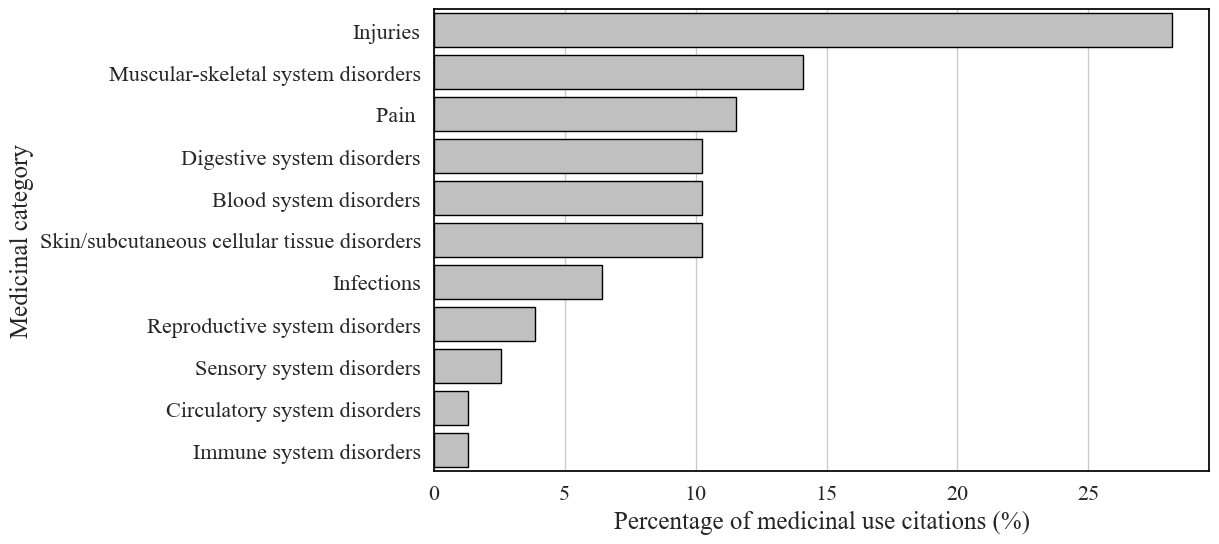

In [770]:


# Set tyle
sns.set(style="whitegrid")
mpl.rcParams['font.family'] = 'Times New Roman'

# Calculate percentages
total_citations = medicine_rows['Nur (Number of use citation for each ailment)'].sum()
medicine_rows['Percentage of citations (%)'] = (medicine_rows['Nur (Number of use citation for each ailment)'] / total_citations) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data=medicine_rows, x='Percentage of citations (%)', y='Use-category', edgecolor='black', color='silver', linewidth=1)


# Set spines color to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# Set labels
ax.set_ylabel('Medicinal category', size=18)
ax.set_xlabel('Percentage of medicinal use citations (%)', size=18)

# Increase font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=16)


plt.show()


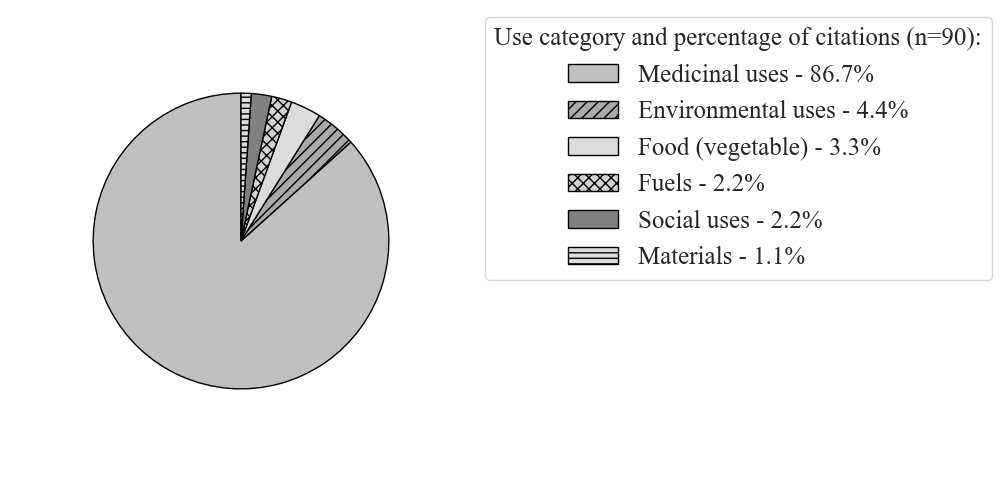

In [769]:


# Add the data
data = {
    'Use categories': ['Medicinal uses', 'Environmental uses', 'Food (vegetable)', 'Fuels', 'Social uses', 'Materials'],
    '% citation': [86.66666666, 4.44444444, 3.333333, 2.222222, 2.222222222, 1.11111111]
}
grouped_df2 = pd.DataFrame(data)

# Set font
mpl.rcParams['font.family'] = 'Times New Roman'

# Set palette
palette = ['silver', 'darkgrey', 'gainsboro', 'lightgrey', 'grey', 'gainsboro']

# Set patterns
hatches = ['', '///', '', 'xxx', '', '---']

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

wedges, texts = ax.pie(
    grouped_df2['% citation'],
    colors=palette,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
     radius=0.8  # Reduce the radius to make the pie smaller
)

# Apply hatches to the wedges
for wedge, hatch in zip(wedges, hatches):
    wedge.set_hatch(hatch)

# Combine categories and percentages for legend labels
legend_labels = [f'{category} - {pct:.1f}%' for category, pct in zip(grouped_df2['Use categories'], grouped_df2['% citation'])]

# Create custom legend
ax.legend(wedges, legend_labels, title="Use category and percentage of citations (n=90):", 
          loc="center left",   title_fontsize=18,  fontsize=18 , bbox_to_anchor=(1, 0.7))

# Adjust the plot 
plt.subplots_adjust(left=0.1, right=0.6)

plt.show()


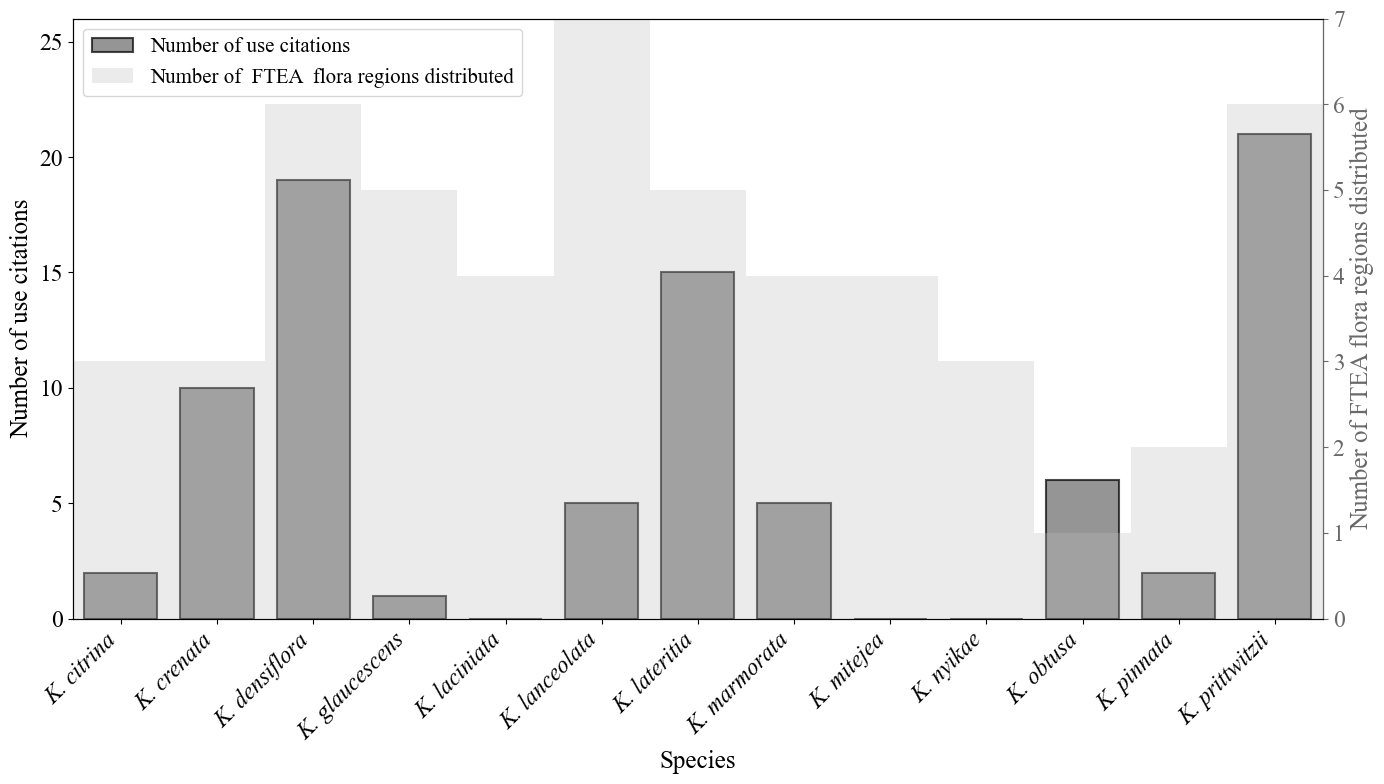

In [438]:

# Create DataFrame from data
data = {
    'Species': ['K. prittwitzii', 'K. lanceolata', 'K. densiflora', 'K. laciniata', 'K. marmorata', 'K. crenata', 
                'K. lateritia', 'K. nyikae', 'K. glaucescens', 'K. obtusa', 'K. citrina', 'K. mitejea', 'K. pinnata'],
    'Distribution': [6, 7, 6, 4, 4, 3, 5, 3, 5, 1, 3, 4, 2],
    'Uses': [21, 5, 19, 0, 5, 10, 15, 0, 1, 6, 2, 0, 2]
}
df = pd.DataFrame(data)

# Sort DataFrame alphabetically by Species
df = df.sort_values(by='Species').reset_index(drop=True)

# Calculate x-axis positions for bars
x = np.arange(len(df['Species']))
width = 0.76  

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Uses
ax1.bar(x, df['Uses'], width=width, color='dimgray', edgecolor='black', linewidth=1.5, alpha=0.7, label='Number of use citations')
ax1.set_ylabel('Number of use citations', fontsize=18)
ax1.set_ylim(0, max(df['Uses']) + 5)  

# Create a twin Axes sharing the x-axis for Distribution
ax2 = ax1.twinx()

# Bar chart for Distribution 
ax2.bar(x, df['Distribution'], width=1.0, color='silver', alpha=0.3, label='Number of  FTEA  flora regions distributed')
ax2.set_ylabel('Number of FTEA flora regions distributed', fontsize=18, color='dimgray')
ax2.set_ylim(0, 7)  # Set y-axis limit for Distribution

# Setting labels and title
ax1.set_xlabel('Species', fontsize=18)
# ax1.set_title('Distribution and Uses of Species', fontsize=16)

# Adjust x-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(df['Species'], rotation=45, ha='right', fontsize=17, fontstyle='italic')

# Remove white spaces on the sides of the chart
ax1.set_xlim(-0.5, len(df['Species']) - 0.5)

# Set the color of the right y-axis and spines to dark gray
ax2.spines['right'].set_color('dimgray')
ax2.yaxis.label.set_color('dimgray')
ax2.tick_params(axis='y', colors='dimgray', labelsize=17)
ax1.tick_params(axis='y', labelsize=17)

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax2.transAxes, title='', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


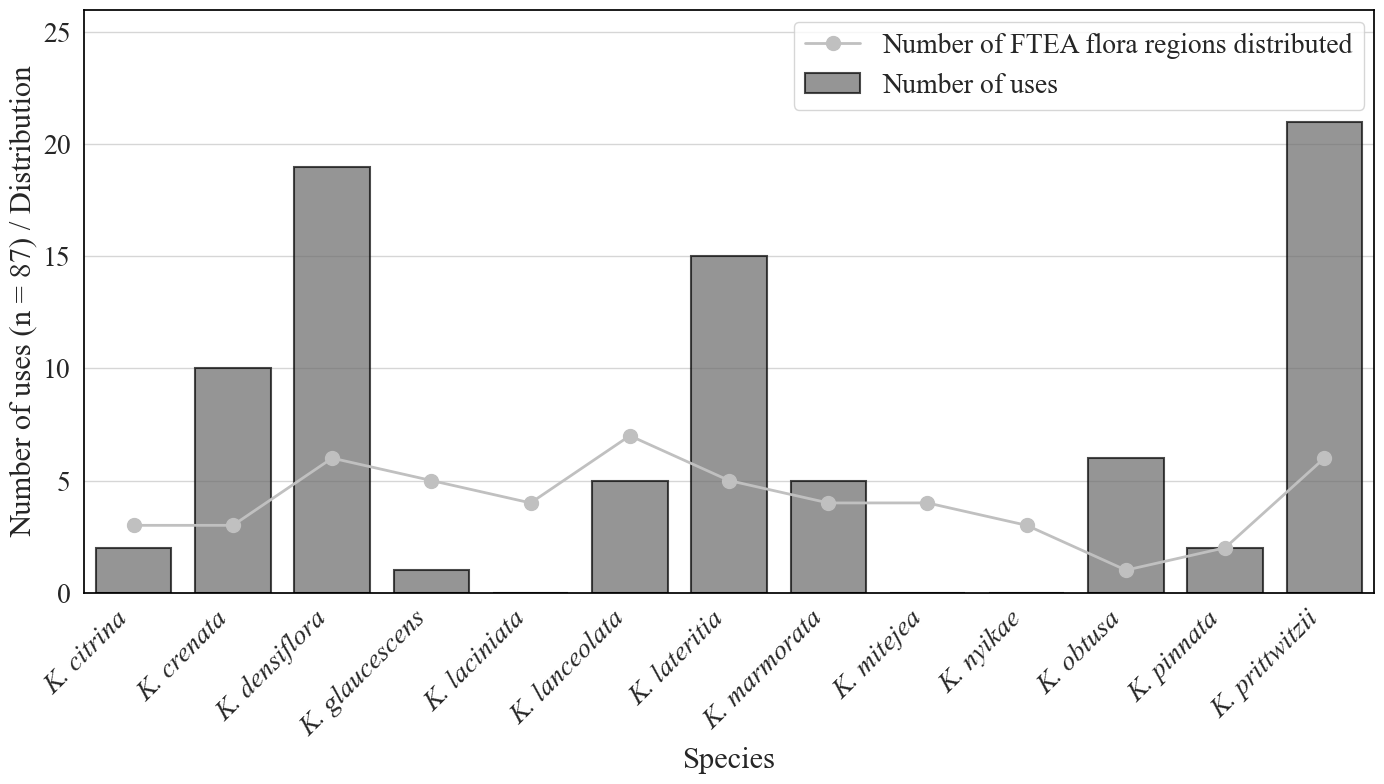

In [684]:
# Create DataFrame from data
data = {
    'Species': ['K. prittwitzii', 'K. lanceolata', 'K. densiflora', 'K. laciniata', 'K. marmorata', 'K. crenata', 
                'K. lateritia', 'K. nyikae', 'K. glaucescens', 'K. obtusa', 'K. citrina', 'K. mitejea', 'K. pinnata'],
    'Distribution': [6, 7, 6, 4, 4, 3, 5, 3, 5, 1, 3, 4, 2],
    'Uses': [21, 5, 19, 0, 5, 10, 15, 0, 1, 6, 2, 0, 2]
}
df = pd.DataFrame(data)
# Set Seaborn style without vertical grid lines
#sns.set(style="whitegrid", rc={'axes.grid': True, 'grid.linestyle': '-', 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})


# Sort DataFrame alphabetically by Species
df = df.sort_values(by='Species').reset_index(drop=True)

# Calculate x-axis positions for bars
x = np.arange(len(df['Species']))
width = 0.76  # Set the width of the bars for "Uses"

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))


ax1.grid(axis='x', linestyle='')
ax1.grid(axis='y', linestyle='-', alpha = 0.8) #line ensures that the horizontal grid lines are dashed.

# Bar chart for Uses
ax1.bar(x, df['Uses'], width=width, color='dimgray', edgecolor='black', linewidth=1.5, alpha=0.7, label='Number of uses')

# Line chart for Distribution with large points
ax1.plot(x, df['Distribution'], color='silver', marker='o', markersize=10, linewidth=2, label='Number of FTEA flora regions distributed')

# Setting labels and title
ax1.set_xlabel('Species', fontsize=22)
ax1.set_ylabel('Number of uses (n = 87) / Distribution', fontsize=22)
ax1.set_ylim(0, max(max(df['Uses']), max(df['Distribution'])) + 5)  

# Adjust x-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(df['Species'], rotation=45, ha='right', fontsize=1, fontstyle='italic')

# Remove white spaces on the sides of the chart
ax1.set_xlim(-0.5, len(df['Species']) - 0.5)

ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['top'].set_color('black')


# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(0.99,0.98), fontsize=20)
# Increase the font size of the axis numbers
ax1.tick_params(axis='both', which='major', labelsize=20)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Tori\AppData\Local\Temp\ipykernel_1492\799939243.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Species_short'] = df['Species'].str.replace('K. ', '')


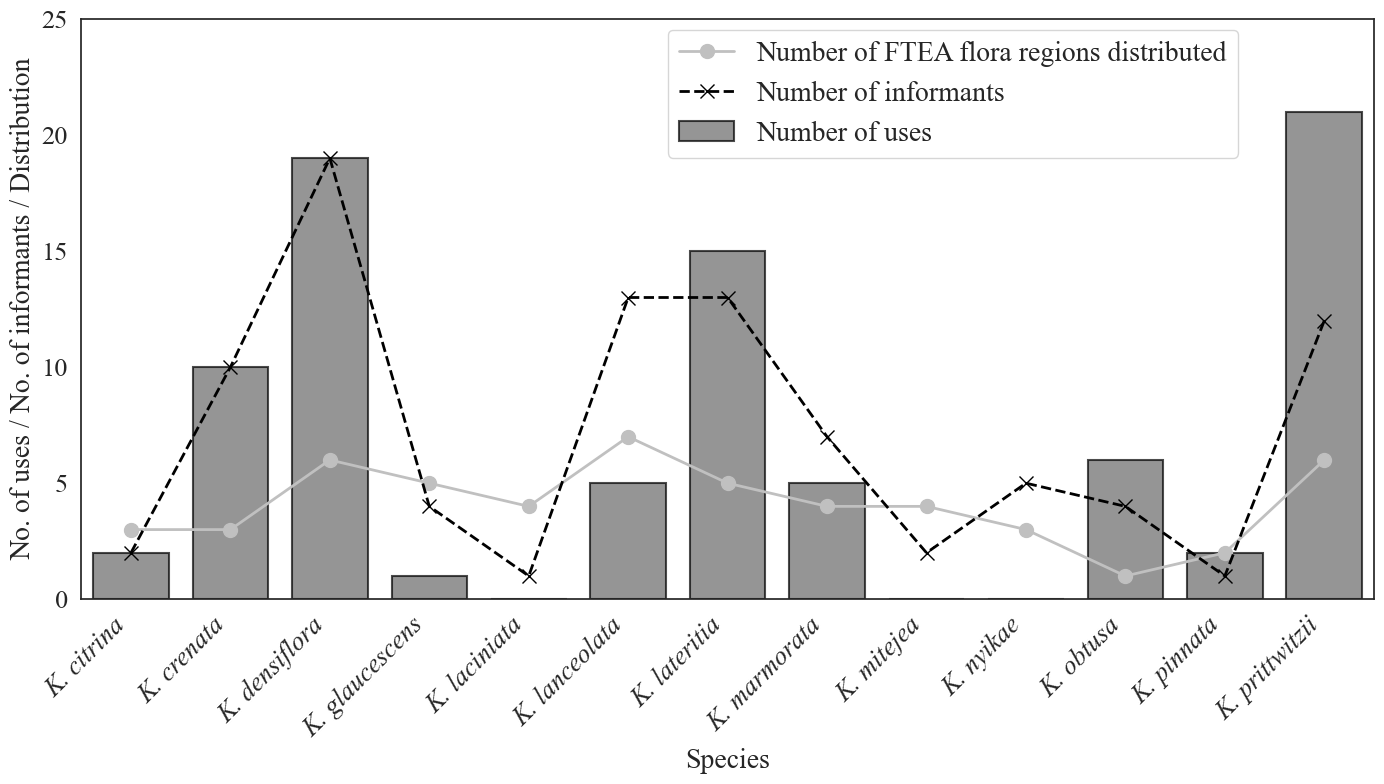

In [773]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn style
sns.set(style="white")
mpl.rcParams['font.family'] = 'Times New Roman'

# Create DataFrame from corrected data
data = {
    'Species': ['K. prittwitzii', 'K. lanceolata', 'K. densiflora', 'K. laciniata', 'K. marmorata', 'K. crenata', 
                'K. lateritia', 'K. nyikae', 'K. glaucescens', 'K. obtusa', 'K. citrina', 'K. mitejea', 'K. pinnata'],
    'Distribution': [6, 7, 6, 4, 4, 3, 5, 3, 5, 1, 3, 4, 2],
    'Uses': [21, 5, 19, 0, 5, 10, 15, 0, 1, 6, 2, 0, 2]
}
df = pd.DataFrame(data)

# Data for species counts
species_count_data = {
    'Species': ['densiflora', 'lanceolata', 'lateritia', 'prittwitzii', 'crenata', 'marmorata', 'nyikae', 
                'glaucescens', 'obtusa', 'citrina', 'mitejea', 'laciniata', 'pinnata'],
    'Count': [19, 13, 13, 12, 10, 7, 5, 4, 4, 2, 2, 1, 1]
}
df_counts = pd.DataFrame(species_count_data)

# Extract species names without the prefix "K. " for sorting
df['Species_short'] = df['Species'].str.replace('K. ', '')

# Sort both DataFrames alphabetically by species names
df = df.sort_values(by='Species_short').reset_index(drop=True)
df_counts = df_counts.sort_values(by='Species').reset_index(drop=True)

# Calculate x-axis positions for bars
x = np.arange(len(df['Species']))
width = 0.76  # Set the width of the bars for "Uses"

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart for Uses
ax.bar(x, df['Uses'], width=width, color='dimgray', edgecolor='black', linewidth=1.5, alpha=0.7, label='Number of uses')
ax.set_ylabel('No. of uses / No. of informants / Distribution', fontsize=20)
ax.set_ylim(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 4)  # Ensure y-axis starts at 0 and has some padding

# Line chart for Distribution with large points
ax.plot(x, df['Distribution'], color='silver', marker='o', markersize=10, linewidth=2, label='Number of FTEA flora regions distributed')

# Line chart for additional species counts
ax.plot(x, df_counts['Count'], color='black', marker='x', markersize=10, linewidth=2, linestyle='--', label='Number of informants')

# Setting labels and title
ax.set_xlabel('Species', fontsize=20)

# Adjust x-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(df['Species'], rotation=45, ha='right', fontsize=17, fontstyle='italic')

# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=19)

# Remove white spaces on the sides of the chart
ax.set_xlim(-0.5, len(df['Species']) - 0.5)

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(0.90,0.97), fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


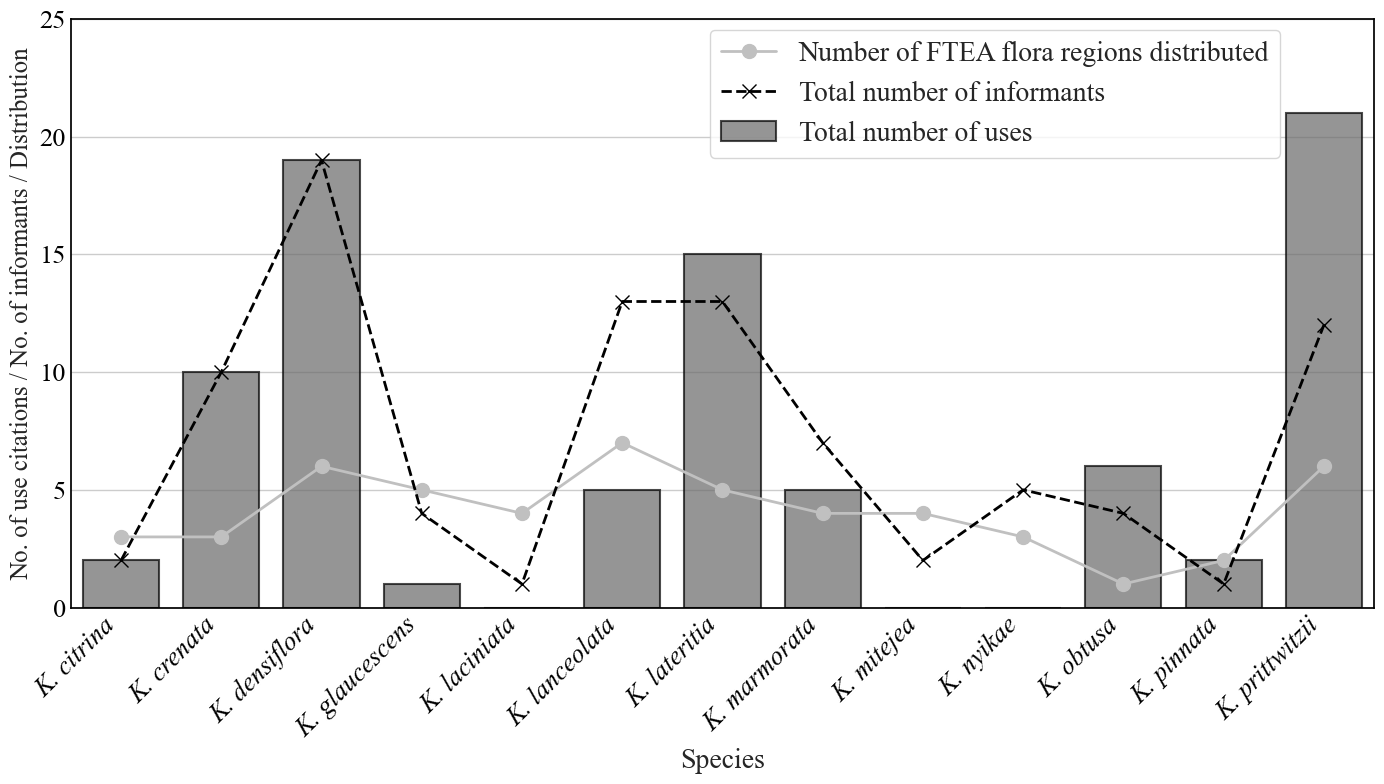

In [777]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create DataFrame from data
data = {
    'Species': ['K. prittwitzii', 'K. lanceolata', 'K. densiflora', 'K. laciniata', 'K. marmorata', 'K. crenata', 
                'K. lateritia', 'K. nyikae', 'K. glaucescens', 'K. obtusa', 'K. citrina', 'K. mitejea', 'K. pinnata'],
    'Distribution': [6, 7, 6, 4, 4, 3, 5, 3, 5, 1, 3, 4, 2],
    'Uses': [21, 5, 19, 0, 5, 10, 15, 0, 1, 6, 2, 0, 2]
}
df = pd.DataFrame(data)

# Sort DataFrame by Species
df = df.sort_values(by='Species').reset_index(drop=True)

# Data for species counts
species_count_data = {
    'Species': ['densiflora', 'lanceolata', 'lateritia', 'prittwitzii', 'crenata', 'marmorata', 'nyikae', 
                'glaucescens', 'obtusa', 'citrina', 'mitejea', 'laciniata', 'pinnata'],
    'Count': [19, 13, 13, 12, 10, 7, 5, 4, 4, 2, 2, 1, 1]
}
df_counts = pd.DataFrame(species_count_data)
mpl.rcParams['font.family'] = 'Times New Roman'

# Make sure both DataFrames have the same order of species
df_counts = df_counts.set_index('Species').reindex(df['Species'].str.split('. ', expand=True)[1], fill_value=0).reset_index()

# Calculate x-axis positions for bars
x = np.arange(len(df['Species']))
width = 0.76 

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Remove vertical grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Add short tick lines without crossing the figure
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.tick_params(axis='y', which='both', direction='out', length=6, width=2, color='black')
ax.tick_params(axis='x', which='both', direction='out', length=6, width=2, color='black')

# Bar chart for Uses
ax.bar(x, df['Uses'], width=width, color='dimgray', edgecolor='black', linewidth=1.5, alpha=0.7, label='Total number of uses')
ax.set_ylabel('No. of use citations / No. of informants / Distribution', fontsize=18)
ax.set_ylim(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 4)  # Ensure y-axis starts at 0 and has some padding

# Line chart for Distribution with large points
ax.plot(x, df['Distribution'], color='silver', marker='o', markersize=10, linewidth=2, label='Number of FTEA flora regions distributed')

# Line chart for additional species counts
ax.plot(x, df_counts['Count'], color='black', marker='x', markersize=10, linewidth=2, linestyle='--', label='Total number of informants')

# Setting labels and title
ax.set_xlabel('Species', fontsize=20)

# Adjust x-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(df['Species'], rotation=45, ha='right', fontsize=17, fontstyle='italic')

# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=19, direction='in', length=6, width=2, colors='black')

# Add ticks at every value on y-axis
ax.set_yticks(np.arange(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 5, 5))
ax.set_yticklabels([str(i) if i % 5 == 0 else '' for i in np.arange(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 5, 5)])

# Set spines color to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# Remove white spaces on the sides of the chart
ax.set_xlim(-0.5, len(df['Species']) - 0.5)

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(0.93,0.97), fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()
